In [3]:
import pandas as pd
import numpy as np
import seaborn
import time
from prefixSpan import prefix_span
from gsp import gsp
from data_loader import importDatabase
import matplotlib.pyplot as plt
import random
import subprocess
import os
import dataSampler

In [6]:
#database paths
bible = "dataSets5k/BIBLE5K.txt"
leviathan = "dataSets5k/LEVIATHAN5K.txt"
korsak = "dataSets5k/KOSARAK5K.txt"

bible_full = "dataSets/BIBLE.txt"
leviathan_full = "dataSets/LEVIATHAN.txt"
korsak_full = "dataSets/KOSARAK.txt"

In [21]:
# speed vs supp theshold %
test_support_thresholds = np.linspace(1, 5, 5)
database_paths = [bible, leviathan, korsak]
#databases = [random.sample(importDatabase(path), 1000) for path in database_paths]
databases = [importDatabase(path) for path in database_paths]
names = ["BIBLE5K", "LEVIATHAN5K", "KOSARAK5K"]

execution_times = []
supp_thresholds = []
algorithm = []
database_name = []

for sth in test_support_thresholds:
    for db, db_name in zip(databases, names):
        # calculate actual support value
        sup = int(sth*len(db)/100)

        print(f"Database: {db_name}, Supp%: {sth}, supp value: {sup}")

        # time datamining
        print("prefix_span") 
        start_time = time.time()
        with open('prefix_span_result.txt', 'w') as file:
            prefix_span(sup, db, file)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(sth)
        algorithm.append("prefix_span")
        database_name.append(db_name)
        
        '''
        #if sth > 2:
        # time datamining 
        print("GSP")
        start_time = time.time()
        with open('gsp_result.txt', 'w') as file:
            gsp(sup, db, file)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(sth)
        algorithm.append("GSP")
        database_name.append(db_name)
        '''

        # time datamining 
        print("SPMF_prefix_span")
        start_time = time.time()
        command = f"java -jar spmf.jar run PrefixSpan dataSets5k/{db_name}.txt output.txt {int(sth)}%"
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        process.wait()
        process.communicate()
        end_time = time.time()
        elapsed_time = end_time - start_time

        os.remove("output.txt") 

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(sth)
        algorithm.append("SPMF PrefixSpan")
        database_name.append(db_name)

time_vs_sup = pd.DataFrame({"execution time [s]": execution_times, 
                            "support threshold [%]": supp_thresholds, 
                            "algorithm": algorithm,
                            "database": database_name})


Database: BIBLE5K, Supp%: 1.0, supp value: 50
prefix_span
SPMF_prefix_span
Database: LEVIATHAN5K, Supp%: 1.0, supp value: 50
prefix_span
SPMF_prefix_span
Database: KOSARAK5K, Supp%: 1.0, supp value: 49
prefix_span
SPMF_prefix_span
Database: BIBLE5K, Supp%: 2.0, supp value: 100
prefix_span
SPMF_prefix_span
Database: LEVIATHAN5K, Supp%: 2.0, supp value: 100
prefix_span
SPMF_prefix_span
Database: KOSARAK5K, Supp%: 2.0, supp value: 99
prefix_span
SPMF_prefix_span
Database: BIBLE5K, Supp%: 3.0, supp value: 150
prefix_span
SPMF_prefix_span
Database: LEVIATHAN5K, Supp%: 3.0, supp value: 150
prefix_span
SPMF_prefix_span
Database: KOSARAK5K, Supp%: 3.0, supp value: 149
prefix_span
SPMF_prefix_span
Database: BIBLE5K, Supp%: 4.0, supp value: 200
prefix_span
SPMF_prefix_span
Database: LEVIATHAN5K, Supp%: 4.0, supp value: 200
prefix_span
SPMF_prefix_span
Database: KOSARAK5K, Supp%: 4.0, supp value: 199
prefix_span
SPMF_prefix_span
Database: BIBLE5K, Supp%: 5.0, supp value: 250
prefix_span
SPMF_pref

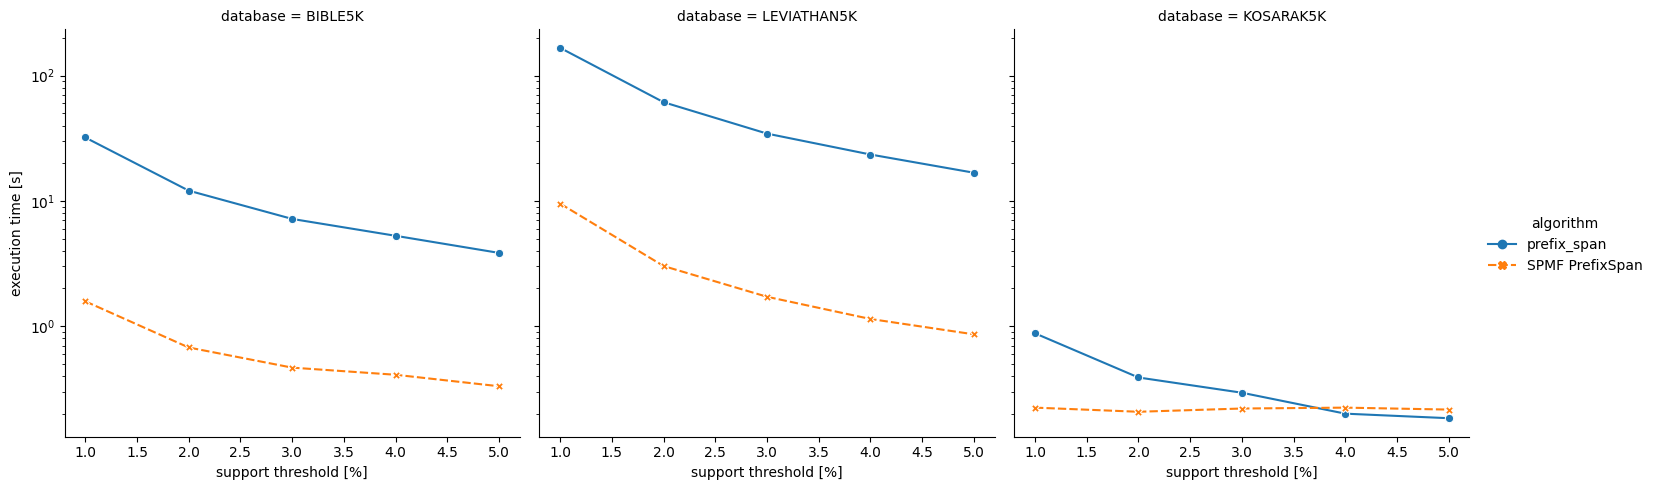

In [22]:
# plot results 
seaborn.relplot(data=time_vs_sup,#data=time_vs_sup[time_vs_sup["algorithm"] != "SPMF PrefixSpan"], 
                x="support threshold [%]",
                y="execution time [s]", 
                hue="algorithm",
                style="algorithm",
                kind="line",
                col="database",
                markers=True
                )
#plt.title("execution time vs support theshold for 1000 sequences from Bible")
plt.yscale('log')


In [23]:
time_vs_sup.to_csv('time_vs_sup_prefix_spans.csv', index=False) 

In [24]:
# speed vs n of sequences
database_paths = [bible_full, leviathan_full, korsak_full]
databases = [importDatabase(path) for path in database_paths]
names = ["BIBLE", "LEVIATHAN", "KOSARAK"]
size_test_support_threshold = 0.1 # 15%

#maxSize = min([len(db) for db in databases])
db_sizes = np.linspace(0.1, 1, 5)

execution_times = []
database_size = []
algorithm = []
supp_thresholds = []
database_name = []


for db, db_name in zip(databases, names):
    for size in db_sizes:
        print(f"Database: {db_name}, db size: {size}")

        sup = int(size_test_support_threshold*len(db)/100)

        # sample from database to create smalled database
        db_sampled = random.sample(db, int(size*len(db)))
        '''
        print("prefix span")
        # time datamining 
        start_time = time.time()
        with open('prefix_span_result.txt', 'w') as file:
            prefix_span(sup, db_sampled, file)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(size_test_support_threshold)
        algorithm.append("prefix_span")
        database_name.append(db_name)
        database_size.append(int(len(db_sampled)))

        print("gsp")
        # time datamining 
        start_time = time.time()
        with open('gsp_result.txt', 'w') as file:
            gsp(sup, db_sampled, file)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(size_test_support_threshold)
        algorithm.append("GSP")
        database_name.append(db_name)
        database_size.append(int(len(db_sampled)))
        '''
        print("SPMF prefix span")
        dataSampler.sample_lines(f"dataSets/{db_name}.txt", "temp_sampled.txt", int(size*len(db)))
        # time datamining 
        start_time = time.time()
        command = f"java -jar spmf.jar run PrefixSpan temp_sampled.txt output.txt {int(sup)}%"
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        process.wait()
        process.communicate()
        end_time = time.time()
        elapsed_time = end_time - start_time

        os.remove("output.txt") 

        # collect data
        execution_times.append(elapsed_time)
        supp_thresholds.append(size_test_support_threshold)
        algorithm.append("SPMF PrefixSpan")
        database_name.append(db_name)
        database_size.append(int(len(db_sampled)))


time_vs_size = pd.DataFrame({"execution time [s]": execution_times, 
                            "support threshold [%]": supp_thresholds, 
                            "algorithm": algorithm,
                            "database": database_name,
                            "N of sequences": database_size})


Database: BIBLE, db size: 0.1
SPMF prefix span
Database: BIBLE, db size: 0.325
SPMF prefix span
Database: BIBLE, db size: 0.55
SPMF prefix span
Database: BIBLE, db size: 0.775
SPMF prefix span
Database: BIBLE, db size: 1.0
SPMF prefix span
Database: LEVIATHAN, db size: 0.1
SPMF prefix span
Database: LEVIATHAN, db size: 0.325
SPMF prefix span
Database: LEVIATHAN, db size: 0.55
SPMF prefix span
Database: LEVIATHAN, db size: 0.775
SPMF prefix span
Database: LEVIATHAN, db size: 1.0
SPMF prefix span
Database: KOSARAK, db size: 0.1
SPMF prefix span
Database: KOSARAK, db size: 0.325
SPMF prefix span
Database: KOSARAK, db size: 0.55
SPMF prefix span
Database: KOSARAK, db size: 0.775
SPMF prefix span
Database: KOSARAK, db size: 1.0
SPMF prefix span


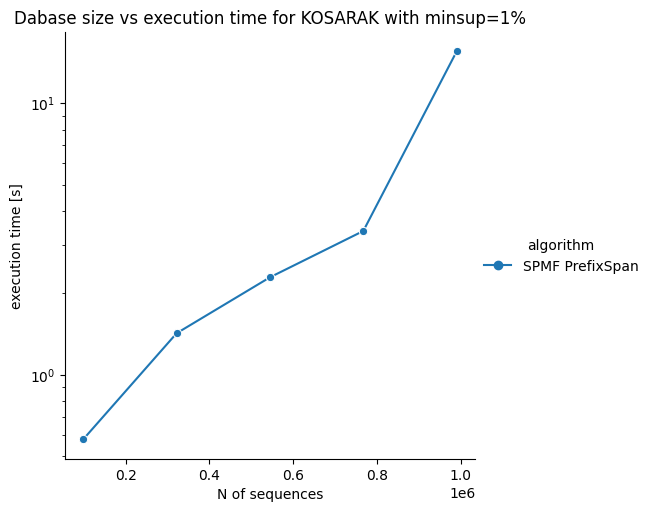

In [27]:
# plot results 
#db = "BIBLE"
#db = "LEVIATHAN"
db = "KOSARAK"
seaborn.relplot(data=time_vs_size[time_vs_size["database"] == db], 
                 x="N of sequences",
                 y="execution time [s]", 
                 hue="algorithm",
                 style="algorithm",
                 #col="database",
                 kind="line",
                 markers=True
                )
plt.title(f"Dabase size vs execution time for {db} with minsup={size_test_support_threshold}%")
plt.yscale('log')

In [20]:
time_vs_size.to_csv(f'time_vs_size{size_test_support_threshold}percent.csv', index=False) 